In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales = pd.read_csv(r"C:\Users\HW\Downloads\advertising.csv")

In [3]:
sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [169]:
sales.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
sales.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
sales.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

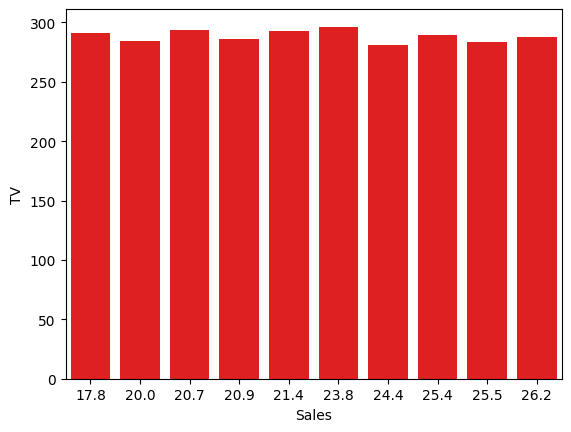

In [50]:
sales1 = sales.sort_values(by = 'TV',ascending = False).head(10)
sns.barplot(x = sales1['Sales'],y = sales1['TV'],data = sales1.head(10),color = 'r')
plt.xlabel('Sales')
plt.ylabel('TV')
plt.show()

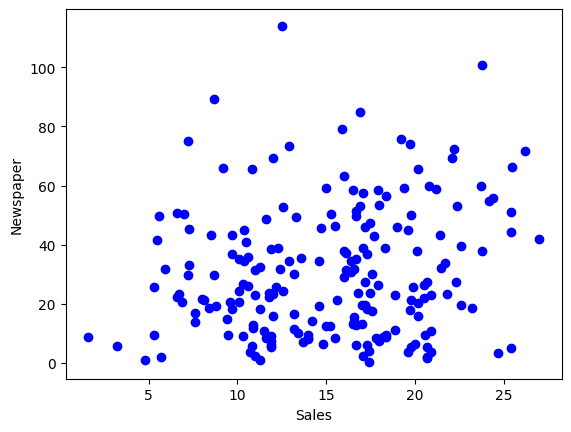

In [48]:
sales['Newspaper'] = pd.to_numeric(sales['Newspaper'],errors= 'ignore')
plt.scatter(sales['Sales'],sales['Newspaper'],color = 'b')
plt.xlabel('Sales')
plt.ylabel('Newspaper')
plt.show()

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


<Axes: >

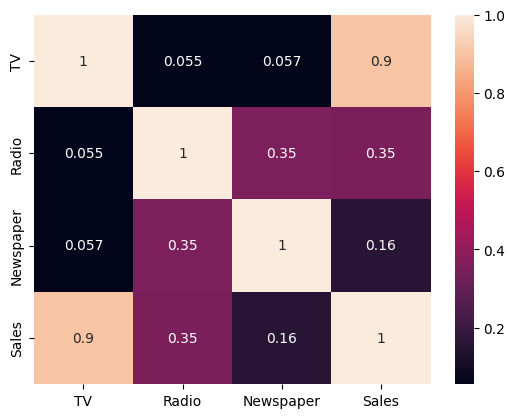

In [168]:
corr = sales.corr()
print(corr)
sns.heatmap(corr,annot = True)

In [154]:
from sklearn.model_selection import train_test_split
x = sales[['Newspaper','TV','Radio']]
y = sales['Sales']
x_train ,x_test , y_train , y_test = train_test_split(x,y,test_size = 0.05, random_state = 50)


In [155]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [156]:
model.fit(x_train,y_train)

LinearRegression()

In [167]:
md = model.predict(x_test)

In [166]:
md


array([15.81964988, 17.89529658,  9.73768528, 12.32317428, 11.48956636,
       19.53173488, 18.18344667,  5.31259558, 21.07421262, 12.24884749])

In [158]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('Linear Regression Metrics:')
print('Mean Squared Error:', mean_squared_error(y_test, md))
print('Mean Absolute Error:', mean_absolute_error(y_test, md))
print('R2 Score:', r2_score(y_test, md))

Linear Regression Metrics:
Mean Squared Error: 0.858776586152975
Mean Absolute Error: 0.8284763589183708
R2 Score: 0.962656854351979
